<a href="https://colab.research.google.com/github/DigDataSteve/Amazon_Customer_Data_Analysis/blob/main/Amazon_Customer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Customer Data Analysis
   First connect to Google Drive and then ead data into a dataframe by way of two different data sources:


1.   SQLite Database
2.   CSV file

Will then perform sentiment analysis and other investigations of the data.



In [3]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3

In [5]:
path = "/content/drive/MyDrive/Amazon_Customer_Data_Analysis/Data"
files = os.listdir(path)
files

['Amazon_Customer_Reviews.csv']

In [6]:
#Create connection to database file
conn = sqlite3.connect('/content/drive/MyDrive/Amazon_Customer_Data_Analysis/amazon_database.sqlite')
type(conn)

sqlite3.Connection

In [7]:
#Check database connection
df = pd.read_sql_query('select * from Reviews', conn)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
#How many rows?
df.shape

(568454, 10)

In [9]:
#Create dataframe via CSV file
csv_df = pd.read_csv(path+'/Amazon_Customer_Reviews.csv')
csv_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
csv_df.shape

(568454, 10)

# Import Sentiment Analysis Modules

In [11]:
!pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from textblob import TextBlob

In [13]:
string = csv_df['Summary'][0]
TextBlob(string).sentiment.polarity

0.7

In [14]:
#Create new dataframe and Add polarity column to dataframe, 'cdf', which stands for 'Customer Data Frame'
cdf = csv_df.copy()
cdf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
polarity = []
for s in cdf['Summary']:
  try:
    polarity.append(TextBlob(s).sentiment.polarity)
  except:
    polarity.append(0)

In [16]:
#Add column containing sentiment of 'Summary'
cdf['Polarity']=polarity
cdf.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


# Perform Exploratory Data Analysis


1.   For positive sentiments
2.   For negative sentiments



In [17]:
positive_data = cdf[cdf['Polarity']>0]
positive_data.shape

(331665, 11)

# WordCloud Analysis
  Intall WordCloud, combine all Summary test, clean the text, remove the stopwords ('he', 'she', 'it', etc. - any word that does not help in analyzing sentiment, and create word cloud

In [18]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from wordcloud import WordCloud,STOPWORDS
stop_words = set(STOPWORDS)
print(stop_words)

{'why', 'would', 'it', "doesn't", 'in', 'on', "you'll", 'you', "there's", 'k', "don't", 'had', 'have', 'could', 'as', 'while', 'else', "weren't", 'each', "i've", 'him', 'this', 'and', 'ourselves', 'between', "wouldn't", 'up', 'my', 'be', 'having', 'otherwise', "here's", 'also', "shan't", 'out', "you're", 'like', 'over', "we've", "where's", 'just', 'are', 'can', 'if', 'before', "shouldn't", 'theirs', 'very', "i'll", "let's", 'she', "isn't", 'an', 'some', "can't", 'with', 'i', "we're", "they've", 'was', 'more', 'com', 'hers', 'that', "they'd", 'been', "that's", 'about', "you'd", 'so', 'the', 'there', 'during', 'their', 'against', 'both', 'therefore', 'http', 'hence', "when's", 'am', 'being', "he's", 'did', 'me', 'your', 'its', "mustn't", "wasn't", 'who', "couldn't", 'by', 'since', 'doing', 'for', 'however', 'or', 'his', 'is', 'nor', "hasn't", 'do', "how's", 'most', "who's", 'once', 'which', "it's", 'further', 'few', 'here', 'too', 'we', 'what', 'all', 'yourself', 'ever', 'those', 'ours',

In [20]:
positive_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.000000


In [21]:
#Join all text in the 'Summary' column
summaries = (' '.join(positive_data['Summary']))
len(summaries)

8465012

In [22]:
print(summaries[:2500])

Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife's favorite Breakfast Why wouldn't you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won't order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps Taste

In [23]:
#Import regular expression module and remove non-letters
import re
summaries = re.sub('[^a-zA-Z]', ' ', summaries)
print(summaries[:2500])

Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Taste

In [24]:
#Replace extra spaces with one space
summaries = re.sub(' +', ' ', summaries)
print(summaries[:2500])

Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you 

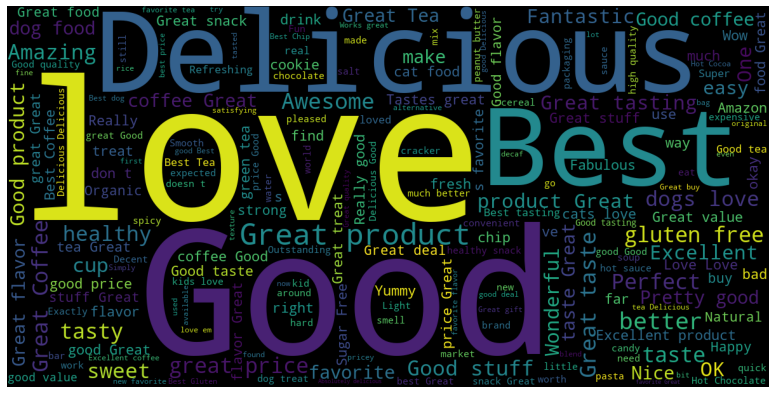

In [25]:
#Create the word cloud and include the removal of the stop words
word_cloud = WordCloud(width=1200, height=600, stopwords=stop_words).generate(summaries)
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(word_cloud)

In [26]:
#Analysis of negative sentiment 
negative_data = cdf[cdf['Polarity']<0]
negative_data.shape

(52516, 11)

In [27]:
#Join all text in 'Summary' column
neg_summaries = (' '.join(negative_data['Summary']))
len(neg_summaries)

1438541

In [28]:
print(neg_summaries[:2500])

poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley's Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don't Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but 

In [29]:
#Remove non-letters from text
neg_summaries = re.sub('[^a-zA-Z]', ' ', neg_summaries)
print(neg_summaries[:2500])

poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but 

In [30]:
#Replace extra spaces with one space
neg_summaries = re.sub(' +', ' ', neg_summaries)
print(neg_summaries[:2500])

poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard t

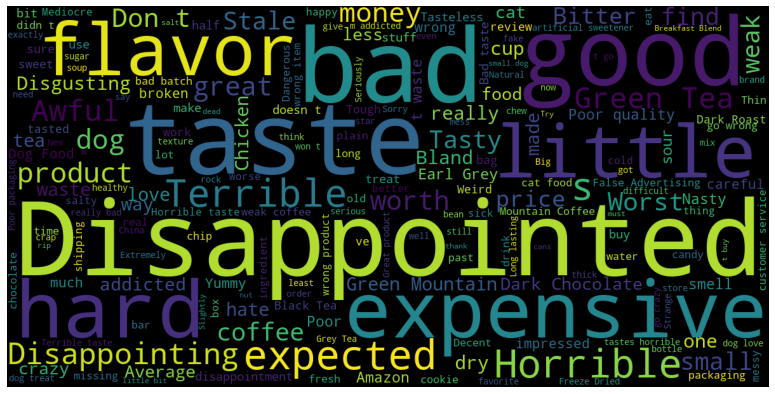

In [31]:
#Create the word cloud with negative words and include the removal of the stop words
word_cloud = WordCloud(width=1200, height=600, stopwords=stop_words).generate(neg_summaries)
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(word_cloud)

# Who to Recommend Products to?
  First learn how many unique users there are.

In [32]:
#Use original dataframe, 'df'. Calculate number of unique users.
df['UserId'].nunique()

256059

In [33]:
#Group the customers by their ID and then count the number of products they purchased
raw_data=df.groupby('UserId').agg({'ProductId':'count','Score':'mean'}).sort_values(by='ProductId', ascending=False)
raw_data.head()

,ProductId,Score
UserId,,
A3OXHLG6DIBRW8,448,4.535714
A1YUL9PCJR3JTY,421,4.494062
AY12DBB0U420B,389,4.647815
A281NPSIMI1C2R,365,4.841096
A1Z54EM24Y40LL,256,4.453125


In [34]:
#Rename columns
raw_data.columns=['Total Products Purchased', 'Overall Avg Rating']
raw_data.head()

,Total Products Purchased,Overall Avg Rating
UserId,,
A3OXHLG6DIBRW8,448,4.535714
A1YUL9PCJR3JTY,421,4.494062
AY12DBB0U420B,389,4.647815
A281NPSIMI1C2R,365,4.841096
A1Z54EM24Y40LL,256,4.453125


In [35]:
#Get top 20 users
top_20_custome_IDs = raw_data.index[0:20]
top_20_custome_IDs.shape

(20,)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

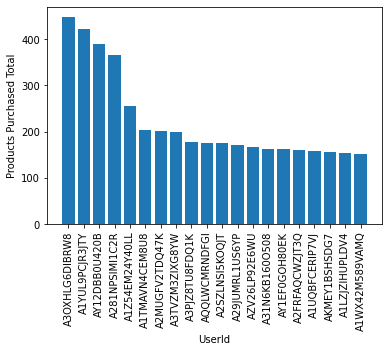

In [36]:
#Plot which customers bought the most producdts
plt.bar(top_20_custome_IDs, raw_data['Total Products Purchased'][0:20], label='Customers')
plt.xlabel("UserId")
plt.ylabel('Products Purchased Total')
plt.xticks(rotation='vertical')

# Analyze Comment Length
  Analyze comment length for a sampling of customer comments

In [37]:
sample_data = cdf[0:5000]
#Check for null values in sample data
sample_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Polarity                  0
dtype: int64

In [38]:
#Check for duplicated rows
sample_data.duplicated().sum()

0

In [39]:
#Calculate length of each comment
def text_len(txt):
  return len(txt.split(' '))

In [40]:
#Turn off warning with next line of code
pd.options.mode.chained_assignment = None 
sample_data['Text_Length'] = sample_data['Text'].apply(text_len)
sample_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity,Text_Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8,30


In [41]:
import plotly.express as px
px.box(sample_data, y='Text_Length')
#Below shows that the median comment length is 55 words

# Analyze the 'Score' that is the rating.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



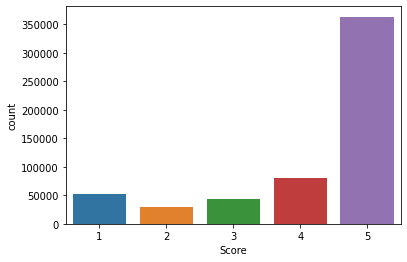

In [42]:
sns.countplot(cdf['Score'], x='Score')

# Analyze Customer Behavior
  First make all words in lower case so it is in the same form.


In [43]:
behavior_df = cdf.copy()
behavior_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [44]:
#Set each letter to lower case
behavior_df['Text'] = behavior_df['Text'].str.lower()
behavior_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price. there was a wid...,0.8


In [45]:
my_puncs = '`",!@#$%^&*()_+=-[]{}`''<>?.,'
len(my_puncs)

27

In [46]:
import string
puncs = string.punctuation
print(len(puncs))

32


In [47]:
#Function to get rid of punctuation and only have letters remaining
def remove_punctuation(txt):
  no_punc = ''
  for char in txt:
    if char not in puncs:
      no_punc = no_punc + char
  return no_punc

In [48]:
behavior_df['Text'] = behavior_df['Text'].apply(remove_punctuation)

In [49]:
behavior_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,0.8


In [50]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
#Install natural language toolkit for text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
data = behavior_df['Text'][164]

In [53]:
cleaned_text = ''
for word in data.split(' '):
  if word not in set(stopwords.words('english')):
    cleaned_text = cleaned_text + word + ' '
  
cleaned_text

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor '

In [54]:
#Functtion to remove stopwords in the provided data. The function uses Python's list comprehension versus other way
def clean_text(text):
  return ' '.join([word for word in text.split(' ') if word not in set(stopwords.words('english'))])

#OTHER WAY:
#   cleaned = ''
#   for w in text.split(' '):
#     if w not in set(stopwords.words('english')):
#       cleaned = cleaned + w + ' '
#   return cleaned

In [55]:
sample = behavior_df[44575:44585]
sample['Text'].head()

44575    twenty five dollars for 4 i bought these at st...
44576    yummy almonds chocolate taste  from the cocoa ...
44577    these nuts while supposedly delectably chocola...
44578    deliciously sweet and chocolatey while having ...
44579    i love hersheys almond bars but mostly just th...
Name: Text, dtype: object

In [58]:
behavior_df['Text'].head()
#shorten number of rows to analyze
behavior_df_sample = behavior_df[0:2000]
behavior_df_sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,0.8


In [59]:
behavior_df_sample['Text'] = behavior_df_sample['Text'].apply(clean_text)
behavior_df_sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy cit...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy...,0.8


# Determine if there are any Links to Websites
   Create regular expressin pattern object.
   

In [60]:
behavior_df['Text'].str.contains('http').sum()

11679

In [61]:
#Create a list of rows with URLs
url_ids = []
count = 1
for i in behavior_df.index:
  if 'http' in behavior_df['Text'][i]:
    url_ids.append(behavior_df['Id'][i])

In [62]:
#Print one row to show it has URL
print(behavior_df['Text'][url_ids[0]-1])

bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a


In [68]:
#Show first 10 rows of Text that contains URL
def url_rows(df, list):
  i = 0
  while i < 10:
    print(df['Text'][list[i]-1])
    i = i + 1

In [69]:
url_rows(behavior_df, url_ids)

bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a
product received advertisedbr br hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a
ordered wife reccomended daughter  almost every morning likes flavors  shes happy im happybr hrefhttpwwwamazoncomgpproductb001eo5qw8mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6a
delicious chocolate excellent espresso bean perfect roast purpose crunchy bittera hrefhttpwwwamazoncomgpproductb00067ad4uchocolate covered espresso beans 5 poundsa
green mountain nantucket blend kcups make good cup coffee hrefhttpwwwamazoncomgpproductb000aqpmhakeurig b40 b40 elite gourmet singlecup homebrewing systema smooth tasting brew wife prefers hrefhttpwwwamazoncomgpproductb0029xdzikcoffee people donut shop kcups keurig brewers 

In [73]:
#Use .compile to create a regex object for repeatable use. '\w' matches any character in Unicode. 
#Using '\w+' matches any word no matter how long it is.
#The '.' (dot) matches any character
url_regex = re.compile(r'http|href.\w+')
#whenever you have this URL regex, replace with nothing
behavior_df['Text'][url_ids[0]-1] = url_regex.sub(r'',behavior_df['Text'][url_ids[0]-1])
print(behavior_df['Text'][url_ids[0]-1])

bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a


In [74]:
len(url_ids)

11679

In [83]:
#Create function to remove any text with http or href text (i.e. any text that may show a URL)
def remove_urls(df, lst):
  url_regex = re.compile(r'http|href.\w+')
  i = 0
  list_len = len(lst)
  while i < list_len:
    df['Text'][lst[i]-1] = url_regex.sub(r'', df['Text'][lst[i]-1])
    i = i + 1
  return df

In [84]:
#Call 'remove_urls' function
remove_urls(behavior_df, url_ids)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.70
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.00
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy cit...,0.00
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.00
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy...,0.80
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,great for sesame chickenthis is a good if not ...,0.00
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,im disappointed with the flavor the chocolate ...,-0.75
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,these stars are small so you can give 1015 of ...,1.00
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,these are the best treats for training and rew...,0.50


In [82]:
print(behavior_df['Text'].str.contains('http').sum())

0


# Word Cloud Presentation of the Cleaned Data
  
*   Re-use 'stop_words', which was defined earlier.
*   Join each 'Text' column.


  

In [87]:
joined_comments = ' '.join(behavior_df['Text'])

(-0.5, 1199.5, 799.5, -0.5)

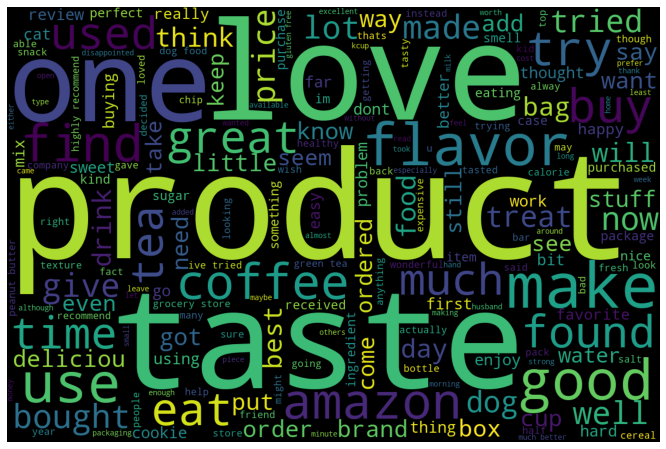

In [88]:
comment_wordcloud = WordCloud(width=1200, height=800, stopwords=stop_words).generate(joined_comments)
plt.figure(figsize=(12,8))
plt.imshow(comment_wordcloud)
plt.axis('off')
